<a href="https://colab.research.google.com/github/M-Chero/Gps/blob/master/RSNA_2023_Abdominal_Trauma_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keys for the os environment

In [ ]:
KAGGLE_USERNAME = "williamgayo"
KAGGLE_KEY = "639be570573a9512724d1f94e807cde4"

# Check current location

In [ ]:
import os

HOME = os.getcwd()
print(HOME)

/content


# Change the current location

In [ ]:
!mkdir -p "Abdominal Trauma Detection"

In [ ]:
os.chdir('/content/Abdominal Trauma Detection/')
os.getcwd()

'/content/Abdominal Trauma Detection'

# Create a new directory

In [ ]:
!mkdir -p "Files"
!mkdir -p "Train Images"

In [ ]:
!pip install kaggle --upgrade --quiet

# Delete a directory

In [ ]:
# rm -r "Files"

In [ ]:
# os.chdir('content/')
# os.getcwd()

# Define keys for the environment variables

In [ ]:
os.environ['KAGGLE_USERNAME'] = KAGGLE_USERNAME
os.environ['KAGGLE_KEY'] = KAGGLE_KEY

# View the competition files

In [ ]:
!kaggle competitions files -c rsna-2023-abdominal-trauma-detection

name                                size  creationDate         
---------------------------------  -----  -------------------  
test_images/48843/62825/30.dcm     265KB  2023-07-31 22:49:42  
test_images/50046/24574/30.dcm     230KB  2023-07-31 22:49:42  
test_images/63706/39279/30.dcm     280KB  2023-07-31 22:49:42  
train_images/10105/42418/104.dcm   225KB  2023-07-31 22:49:42  
train_images/10105/42418/11.dcm    233KB  2023-07-31 22:49:42  
train_images/10105/42418/102.dcm   227KB  2023-07-31 22:49:42  
train_images/10105/42418/17.dcm    228KB  2023-07-31 22:49:42  
train_images/10105/42418/14.dcm    231KB  2023-07-31 22:49:42  
train_images/10105/42418/2.dcm     235KB  2023-07-31 22:49:42  
train_images/10105/42418/105.dcm   224KB  2023-07-31 22:49:42  
train_images/10105/42418/10.dcm    234KB  2023-07-31 22:49:42  
train_images/10105/42418/19.dcm    229KB  2023-07-31 22:49:42  
train_images/10105/42418/103.dcm   226KB  2023-07-31 22:49:42  
train_images/10105/42418/16.dcm    229KB

# Download particular files to a particular folder
### Identifying particular files is done by using ***grep train_images/10051***. Reference the list of files above to identify a folder.

### Susan for example is a particular folder directory. Make sure to create a directory where you would like to save your downloaded data.

In [ ]:
!kaggle competitions files -c rsna-2023-abdominal-trauma-detection | grep -E 'train.csv|image_level_labels.csv|train_series_meta.csv|test_series_meta.csv|sample_submission.csv' | awk '{print $1}' | while read -r line; do kaggle competitions download -c rsna-2023-abdominal-trauma-detection -f "$line" -p "Files"; done

100% 347k/347k [00:00<00:00, 3.14MB/s]
100% 347k/347k [00:00<00:00, 3.13MB/s]
  0% 0.00/138 [00:00<?, ?B/s]
100% 138/138 [00:00<00:00, 335kB/s]
100% 104k/104k [00:00<00:00, 1.05MB/s]
100% 104k/104k [00:00<00:00, 1.04MB/s]
  0% 0.00/90.7k [00:00<?, ?B/s]
100% 90.7k/90.7k [00:00<00:00, 1.71MB/s]
  0% 0.00/771 [00:00<?, ?B/s]
100% 771/771 [00:00<00:00, 967kB/s]


# Train series(scan) metadata

In [ ]:
import pandas as pd

train_scan_metadata = pd.read_csv("Files/train.csv")
train_scan_metadata.head()

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury
0,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1
1,10005,1,0,1,0,1,0,0,1,0,0,1,0,0,0
2,10007,1,0,1,0,1,0,0,1,0,0,1,0,0,0
3,10026,1,0,1,0,1,0,0,1,0,0,1,0,0,0
4,10051,1,0,1,0,1,0,0,1,0,0,0,1,0,1


# Sample Submission

In [ ]:
sample_submission = pd.read_csv("Files/sample_submission.csv")
sample_submission.head()

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high
0,48843,0.5,0.5,0.5,0.5,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
1,50046,0.5,0.5,0.5,0.5,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
2,63706,0.5,0.5,0.5,0.5,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333


# Image Level Labels

In [ ]:
image_level_labels = pd.read_csv("Files/image_level_labels.csv")
image_level_labels

,patient_id,series_id,instance_number,injury_name
0,10004,21057,362,Active_Extravasation
1,10004,21057,363,Active_Extravasation
2,10004,21057,364,Active_Extravasation
3,10004,21057,365,Active_Extravasation
4,10004,21057,366,Active_Extravasation
...,...,...,...,...
12024,9632,3750,155,Active_Extravasation
12025,9632,3750,156,Active_Extravasation
12026,9632,3750,157,Active_Extravasation
12027,9632,3750,158,Active_Extravasation


# Getting a bowel image
## Getting an injured bowel image

In [ ]:
train_scan_metadata_image_level_labels = train_scan_metadata.merge(image_level_labels, on='patient_id', how='inner')
train_scan_metadata_image_level_labels

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury,series_id,instance_number,injury_name
0,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,362,Active_Extravasation
1,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,363,Active_Extravasation
2,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,364,Active_Extravasation
3,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,365,Active_Extravasation
4,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,366,Active_Extravasation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12024,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,3750,155,Active_Extravasation
12025,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,3750,156,Active_Extravasation
12026,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,3750,157,Active_Extravasation
12027,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,3750,158,Active_Extravasation


In [ ]:
train_scan_metadata_image_level_labels_bowel_injured = train_scan_metadata_image_level_labels.loc[(train_scan_metadata_image_level_labels['bowel_injury'] == 1) & (train_scan_metadata_image_level_labels['extravasation_healthy'] == 1) & (train_scan_metadata_image_level_labels['kidney_healthy'] == 1) & (train_scan_metadata_image_level_labels['liver_healthy'] == 1) & (train_scan_metadata_image_level_labels['spleen_healthy'] == 1) & (train_scan_metadata_image_level_labels['injury_name'] == "Bowel")]
train_scan_metadata_image_level_labels_bowel_injured.drop_duplicates(subset = ['patient_id', 'series_id'], inplace = True)
train_scan_metadata_image_level_labels_bowel_injured

<ipython-input-26-dbeda8291c89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_scan_metadata_image_level_labels_bowel_injured.drop_duplicates(subset = ['patient_id', 'series_id'], inplace = True)


,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury,series_id,instance_number,injury_name
105,10065,0,1,1,0,1,0,0,1,0,0,1,0,0,1,37324,48,Bowel
372,10929,0,1,1,0,1,0,0,1,0,0,1,0,0,1,34169,70,Bowel
419,11335,0,1,1,0,1,0,0,1,0,0,1,0,0,1,24276,64,Bowel
450,11335,0,1,1,0,1,0,0,1,0,0,1,0,0,1,39434,123,Bowel
993,12332,0,1,1,0,1,0,0,1,0,0,1,0,0,1,15276,58,Bowel
1008,12332,0,1,1,0,1,0,0,1,0,0,1,0,0,1,2793,107,Bowel
1042,12951,0,1,1,0,1,0,0,1,0,0,1,0,0,1,21811,600,Bowel
1239,13403,0,1,1,0,1,0,0,1,0,0,1,0,0,1,21078,103,Bowel
1248,13403,0,1,1,0,1,0,0,1,0,0,1,0,0,1,64814,47,Bowel
2907,19763,0,1,1,0,1,0,0,1,0,0,1,0,0,1,12621,60,Bowel


# Image preview of bowel injured patient (10065)

In [ ]:
!kaggle competitions files -c rsna-2023-abdominal-trauma-detection | grep -E 'train_images/10065/37324' | awk '{print $1}' | while read -r line; do kaggle competitions download -c rsna-2023-abdominal-trauma-detection -f "$line" -p "Train Images/Bowel Injuries/10065/37324"; done

100% 231k/231k [00:00<00:00, 1.36MB/s]
100% 231k/231k [00:00<00:00, 1.36MB/s]
100% 238k/238k [00:00<00:00, 1.39MB/s]
100% 238k/238k [00:00<00:00, 1.39MB/s]
100% 244k/244k [00:00<00:00, 1.41MB/s]
100% 244k/244k [00:00<00:00, 1.40MB/s]
100% 229k/229k [00:00<00:00, 1.35MB/s]
100% 229k/229k [00:00<00:00, 1.35MB/s]
100% 232k/232k [00:00<00:00, 1.38MB/s]
100% 232k/232k [00:00<00:00, 1.37MB/s]
100% 239k/239k [00:00<00:00, 1.41MB/s]
100% 239k/239k [00:00<00:00, 1.41MB/s]
100% 234k/234k [00:00<00:00, 1.40MB/s]
100% 234k/234k [00:00<00:00, 1.39MB/s]
100% 230k/230k [00:00<00:00, 1.37MB/s]
100% 230k/230k [00:00<00:00, 1.36MB/s]
100% 239k/239k [00:00<00:00, 1.41MB/s]
100% 239k/239k [00:00<00:00, 1.40MB/s]
100% 230k/230k [00:00<00:00, 1.35MB/s]
100% 230k/230k [00:00<00:00, 1.35MB/s]
100% 243k/243k [00:00<00:00, 1.41MB/s]
100% 243k/243k [00:00<00:00, 1.40MB/s]
100% 235k/235k [00:00<00:00, 1.34MB/s]
100% 235k/235k [00:00<00:00, 1.34MB/s]
100% 230k/230k [00:00<00:00, 1.27MB/s]
100% 230k/230k [00:00<00:

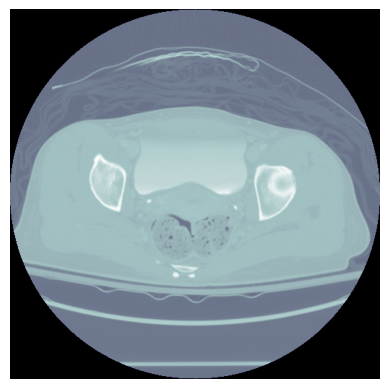

In [ ]:
import pydicom
from pydicom.data import get_testdata_file
import matplotlib.pyplot as plt

dicom_file_path = "Train Images/Bowel Injuries/10065/37324/117.dcm"
img_array = pydicom.dcmread(dicom_file_path, force=True).pixel_array

plt.imshow(img_array, cmap=plt.cm.bone)
plt.axis('off')
plt.show()

In [ ]:
!kaggle competitions files -c rsna-2023-abdominal-trauma-detection | grep -E 'train_images/10929/34169' | awk '{print $1}' | while read -r line; do kaggle competitions download -c rsna-2023-abdominal-trauma-detection -f "$line" -p "Train Images/Bowel Injuries/10929/34169"; done

In [ ]:
dicom_file_path = "/content/Abdominal Trauma Detection/Train Images/Bowel Injuries/10929/34169/10.dcm"
img_array = pydicom.dcmread(dicom_file_path, force=True).pixel_array

plt.imshow(img_array, cmap=plt.cm.bone)
plt.axis('off')
plt.show()